<a href="https://colab.research.google.com/github/DN444/bookrecommender/blob/main/a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install pandas matplotlib seaborn scikit-learn

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
books=pd.read_csv('books.csv',on_bad_lines='skip')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [57]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [58]:
titles=books['title'].nunique()
authors=books['authors'].nunique()
publishers=books['publisher'].nunique()
languages=books['language_code'].nunique()
print('Number of Titles in dataset:',titles)
print('Number of Authors in dataset:',authors)
print('Number of Publishers in dataset:',publishers)
print('Number of Languages in dataset:',languages)

Number of Titles in dataset: 10348
Number of Authors in dataset: 6639
Number of Publishers in dataset: 2290
Number of Languages in dataset: 27


In [59]:
author_stats=books.groupby('authors')['average_rating'].agg(['count','mean'])
author_stats.head()
C=author_stats['count'].mean()
m=author_stats['mean'].mean()
def bayesian_rating(ratings):
    bayesian_average=(C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_average,3)

In [60]:
bayesian_stats=books.groupby('authors')['average_rating'].agg(bayesian_rating).reset_index()
bayesian_stats.sort_values(by='average_rating',ascending=False).iloc[0:10]

,authors,average_rating
628,Bill Watterson,4.558
2453,Hiromu Arakawa/Akira Watanabe,4.488
2455,Hiromu Arakawa/荒川弘/方郁仁,4.448
2622,J.K. Rowling,4.436
2626,J.K. Rowling/Mary GrandPré,4.413
2452,Hiromu Arakawa,4.393
5192,Richard P. Feynman/Robert B. Leighton/Matthew ...,4.370
2340,Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yama...,4.368
1050,Cook's Illustrated Magazine,4.357
2640,J.R.R. Tolkien,4.354


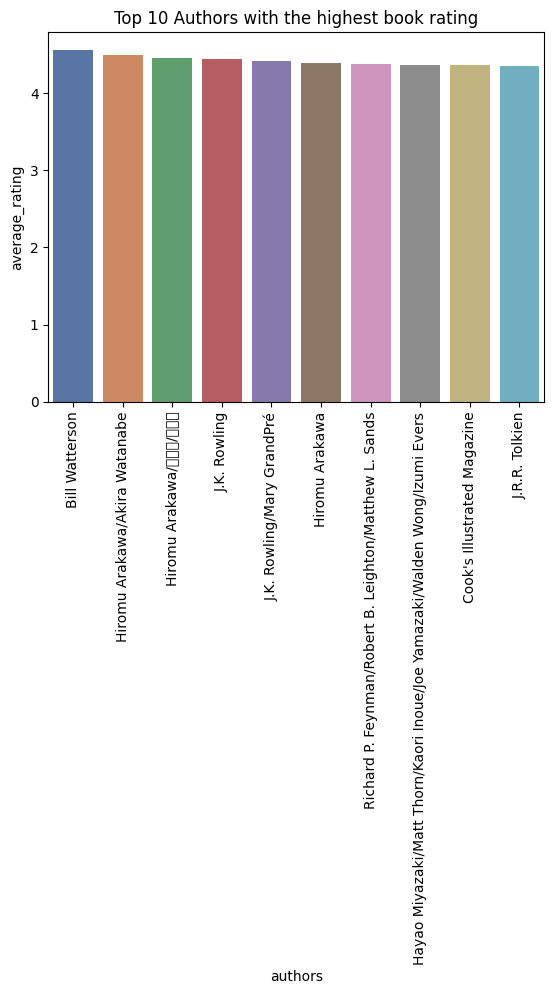

In [61]:
top_10_authors = bayesian_stats.sort_values(by='average_rating',ascending=False).iloc[0:10]
sns.barplot(data=top_10_authors,x='authors',y='average_rating',palette='deep')
plt.title('Top 10 Authors with the highest book rating')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
plt.xticks(rotation=90)
plt.show()

In [62]:
authors=books['authors'].value_counts()
count_authors=pd.DataFrame(authors.sort_values(ascending=False).iloc[0:10]).reset_index()
count_authors.head()

,authors,count
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33


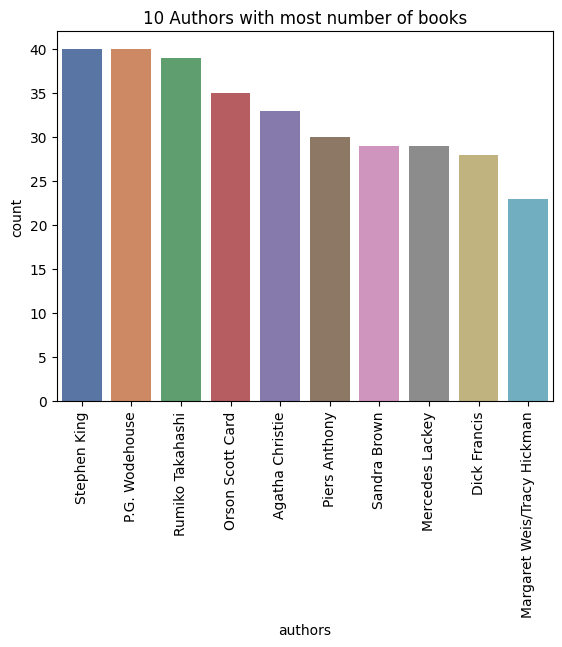

In [63]:
sns.barplot(data=count_authors,x='authors',y='count',palette='deep',hue='authors',legend=False)
plt.xticks(rotation=90)
plt.title('10 Authors with most number of books')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.show()

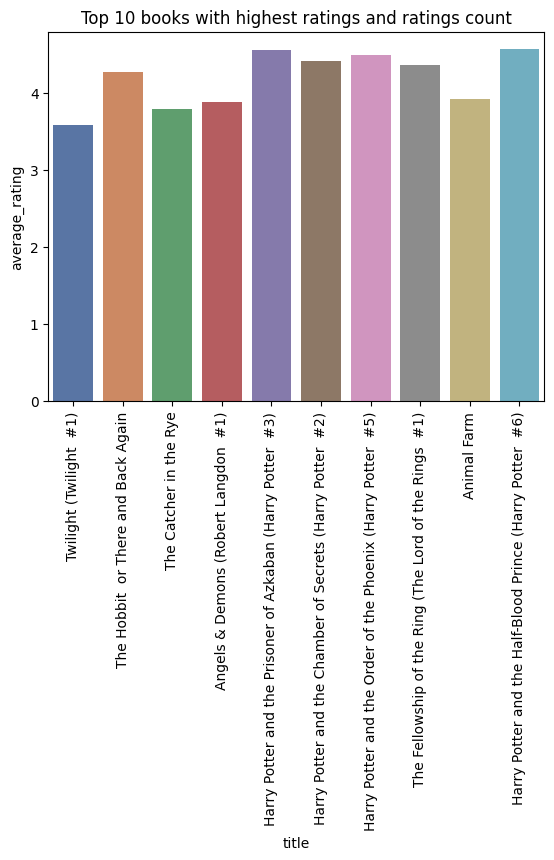

In [64]:
books['weighted_rating']=0.7*books['average_rating']+0.3*books['ratings_count']
top_10_books=books.sort_values(by='weighted_rating',ascending=False).iloc[0:10]
sns.barplot(data=top_10_books,x='title',y='average_rating',palette='deep')
plt.xticks(rotation=90)
plt.title('Top 10 books with highest ratings and ratings count')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.show()

In [65]:
!pip install fuzzywuzzy

In [66]:
from fuzzywuzzy import process
def book_finder(title):
    all_titles=books['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [67]:
books['tags']=books['title']+books['authors']+books['language_code']+books['publisher']
booksnew=books[['title','tags']]
booksnew

,title,tags
0,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
1,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix (Har...
2,Harry Potter and the Chamber of Secrets (Harry...,Harry Potter and the Chamber of Secrets (Harry...
3,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban (Harr...
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,Expelled from Eden: A William T. Vollmann Read...
11119,You Bright and Risen Angels,You Bright and Risen AngelsWilliam T. Vollmann...
11120,The Ice-Shirt (Seven Dreams #1),The Ice-Shirt (Seven Dreams #1)William T. Voll...
11121,Poor People,Poor PeopleWilliam T. VollmannengEcco


In [68]:
booksnew['tags']=booksnew['tags'].apply(lambda X: X.lower())

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [76]:
vectors=cv.fit_transform(booksnew['tags']).toarray()

In [74]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
booksnew['tags']=booksnew['tags'].apply(stem)

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [83]:
def recommend(book):
    book_title=book_finder(book)
    book_index=booksnew[booksnew.title == book_title].index[0]
    distances=similarity[book_index]
    book_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    print('Because you read:',book_title)
    for i in book_list:
        print(booksnew.iloc[i[0]].title)

In [84]:
recommend('the lord of the rings')

Because you read: The Lord of the Rings
The Avalanche Handbook
The Last Temptation
The White Masai
The Whipping Boy
The Tolkien Reader


In [87]:
recommend('harry potter')

Because you read: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)
Harry Potter ve Sırlar Odası (Harry Potter  #2)


In [88]:
recommend('catcher in the rye')

Because you read: The Catcher in the Rye
Franny and Zooey
The Pilot's Wife
The Diviners
The Magus
Raise High the Roof Beam  Carpenters & Seymour: An Introduction
